**CSC 466: Knowledge Discovery in Data **

** Individual Test**

**Task 2 **

**Your Name :**

**Cal Poly Email:**


**Your Assignment**:

1. Run 10-fold cross-validation on top of the trainMagicClassifier() classification method
2. For each fold, report prediction accuracy
3. Report overall prediction accuracy
4. Report the overall confusion matrix

In [1]:
## Imports

import numpy as np
from matplotlib import pyplot as plt
import seaborn
%matplotlib inline

**Classifier**

trainMagicClassifier() is a simple implementation of Support Vector Machine, with some hardcoded parameters.
It takes as input a dataset "data", the array of labels "labels" (data point data[i] has class label label[i]), and two hyperparameters: Rate (this parameter in the context of SVMs is called the learing rate) and the number of iterations to complete (SVMs are typically trained using an iterative approach until convergence, this classifier replaces convergence with simply a number of iterations).

You do not need to understand the code in trainMagicClassifier(), nor do you need to make any changes in this part of the notebook.  The trained model is three coefficients  model[0], model[1], model[2], which combine to form an equation of a line in 2D that separates the two classes:

$$model[0]\cdot x + model[1]\cdot y + model[2] = 0$$

where $x$ and $y$ are the coordinates of the 2D data point.

**Note:** like all SVM classifiers, ours works only on binary classes, with class labels  +1 and -1.



In [2]:
def trainMagicClassifier(data, labels, Rate, iterations):

    C = 2 ## error significance
    thetas = np.ones(len(data))*-1
    w = np.array([-1,0,0])      # starting approximation  
    
    # svmData = np.array([data[0],data[1], thetas])
    for j in range(iterations):
        HingeLoss = np.array([0,0,0])
        for i in range(len(data)):
            datum = data[i]
    
    ## compute the hinge loss
            y = labels[i]
            uVector = np.array([datum[0], datum[1], thetas[i]])
            if (w[0]*datum[0]+ w[1]*datum[1]+ w[2]*thetas[i])*y <= 1:
                HingeLoss = HingeLoss  - y*uVector
    
 
        w = w - Rate *(w + C * HingeLoss)
        ##print("W:", w)
        ## print("Loss:", HingeLoss)
        ## plotW(slo,paso,w)
    return(w)
       

**Predictor**:

Using the model trained in trainMagicClassifier(), the predictor computes on which side of the line separating the classes a data point is, and returns the side (above = +1, below = -1) as the class predictor.

You do not need to modify this code.

In [3]:
def predict(model, point):
    value = np.sign(model[0]*point[0]+model[1]*point[1]+model[2])
    ## print(value)
    return value

The generatePredictions(function) simply generates the list of predictions given a collection of the data points

In [4]:
def generatePredictions(model, data):
    predictions = [predict(model, point) for point in data]
    return predictions

**Execution Starts Here**

First, we read the data, and split the input into the data table, and the class labels table.

In [5]:
filename="data5.csv"

rawData = np.loadtxt(filename, delimiter = ",")

## let's keep only the two columns with the data attributes

data = rawData[:,0:2]
labels = rawData[:,2]

**Training the Classifier**

We set the learning rate to 0.01 (established empirically, don't worry about it).
Then we train the classifier on the entire data set.

In [6]:
rate = 0.01
model = trainMagicClassifier(data, labels, rate, 20)

Below,we display the learned model parameters

In [7]:
model

array([-7.35152749,  5.94812682,  1.17282658])

... and generate the predictions

In [8]:
predictions =generatePredictions(model,data)

**Plotting**
To illustrate the accuracy of the predictor we plot the model (blue line) against the scatter plot of the dataset colored according to the ground truth labels.

As seen, our predictor does really well, misclassifying only two red points at the left edge of the scatter plot.

**However**, we trained and tested on the same data.

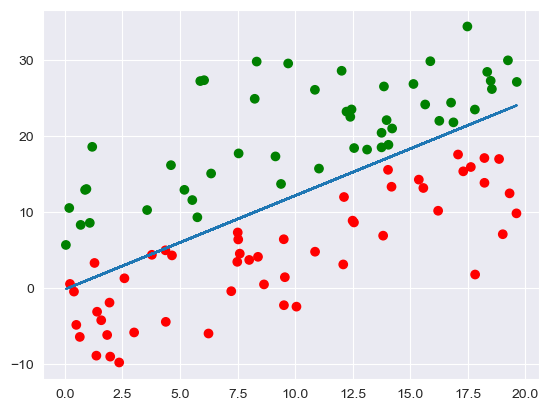

In [9]:
colors = ['red','red', 'green']
prColors = [colors[int(i+1)] for i in labels ]

plt.scatter(data[:,0], data[:,1], c=prColors)
plt.plot(data[:,0], -(model[0]/model[1])*data[:,0] - model[2]/model[1])



**Your Task**
In the cells below build the functionality for conducting the 10-fold cross-validation of the trainMagicClassifier() classifier.

Each fold shall contain 10% of randomly selected points from the input dataset.

For each fold, train on all other folds, then test on it and compute the accuracy.

Report the accuracy of each fold, overall accuracy, and print out the confusion matrix

**Notes**: you may want to create a function that splits the dataset into folds. For this task, it is ok to create 10 copies of the data (our dataset is small enough), if this makes your life easier, but you can also construct each training and testing set separately.

There is no need to visualize any steps using graphs, but you can use the plotting structure above to make things look better for


In [10]:
import pandas as pd

In [15]:
def split_folds(k):
    return np.array_split(np.random.permutation(rawData.shape[0]), k)

In [43]:
def validate(k):
    conf_matrix = None
    accuracy = []
    splits = split_folds(k)
    for i, split in enumerate(splits):
        test = data[split]
        test_index = split
        train_index = np.concatenate([splits[j] for j in range(len(splits)) if i != j])
        train = data[train_index]
        model = trainMagicClassifier(train, labels, rate, 20)
        preds = pd.Series(generatePredictions(model,test), name="preds")
        obs = pd.Series(labels[test_index], name="obs")
        accuracy.append((preds == obs).sum() / len(obs))
        if conf_matrix is None:
            conf_matrix = pd.crosstab(preds, obs)
        else:
            conf_matrix = conf_matrix.add(pd.crosstab(preds, obs), fill_value=0)

    accuracy = pd.Series(accuracy, name="accuracy")
    accuracy.index.name = "fold"
    print(accuracy.to_frame().T)
    print()

    overall_acc = accuracy.sum() / len(accuracy.index)
    print(f"overall accuracy: {overall_acc:0.3f}")
    print()

    print(conf_matrix.to_string())

In [53]:
validate(10)

fold        0    1    2    3    4    5    6    7    8    9
accuracy  0.8  0.7  0.7  0.7  0.5  0.3  0.4  0.3  0.6  0.9

overall accuracy: 0.590

obs    -1.0   1.0
preds            
-1.0   38.0  27.0
 1.0   14.0  21.0


**Congratulations!** You are done.

Download the notebook and submit it using the

        handin dekhtyar 466-test <file> 
        
 command.